In [64]:
#importing libraries 
import pandas as pd
import numpy as np 
from IPython.display import HTML, display
import pydicom
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns





In [ ]:
import os
TRAIN_IMG_DIR= r"C:\Users\samya\PyCharmProject\Pneumonia-Detection_dataset\data\stage_2_train_images"

train_img_path = [os.path.join(TRAIN_IMG_DIR, i) for i in os.listdir(TRAIN_IMG_DIR) if i.endswith('.dcm')]

# Display number of images
display(HTML(f"<strong>Number of images present in the train directory is {len(train_img_path)}</strong>"))

In [ ]:
TEST_IMG_DIR= r"C:\Users\samya\PyCharmProject\Pneumonia-Detection_dataset\data\stage_2_test_images"

test_img_path = [os.path.join(TEST_IMG_DIR, i) for i in os.listdir(TEST_IMG_DIR) if i.endswith('.dcm')]

# Display number of images
display(HTML(f"<strong>Number of images present in the train directory is {len(test_img_path)}</strong>"))

In [ ]:
df_detail_class= pd.read_csv(r"C:\Users\samya\PyCharmProject\Pneumonia-Detection_dataset\data\stage_2_detailed_class_info.csv")
df_lable= pd.read_csv(r"C:\Users\samya\PyCharmProject\Pneumonia-Detection_dataset\data\stage_2_train_labels.csv")

In [44]:
def display_dicom_samples(image_paths, num_samples=5, title="DICOM Samples"):
    """
    Displays a specified number of DICOM images from a given list of paths.

    Parameters:
    - image_paths (list): List of file paths to DICOM images.
    - num_samples (int): Number of images to display.
    - title (str): Title prefix for each image displayed.
    """
    for idx, img_path in enumerate(image_paths[:num_samples]):
        try:
            dicom_img = pydicom.dcmread(img_path)

            if hasattr(dicom_img, 'pixel_array'):
                plt.figure(figsize=(6, 6))
                plt.imshow(dicom_img.pixel_array, cmap='gray')
                plt.title(f"{title} - {os.path.basename(img_path)}")
                plt.axis('off')
                plt.show()
            else:
                print(f"No pixel data in: {img_path}")

        except Exception as e:
            print(f"Error reading {img_path}: {e}")


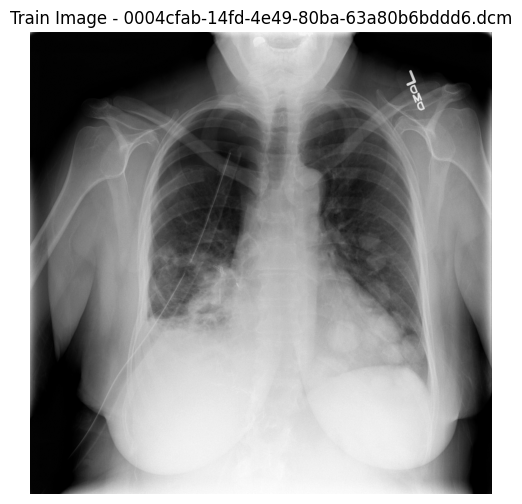

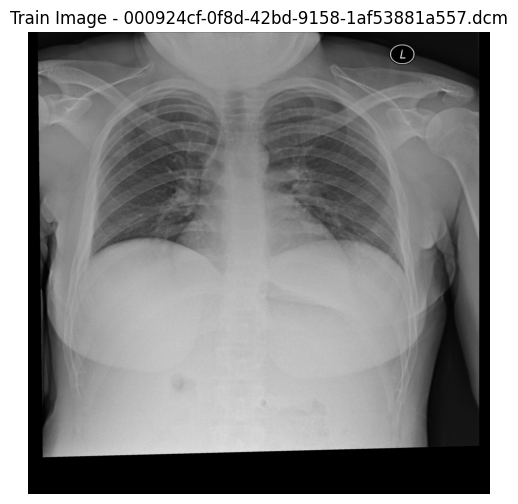

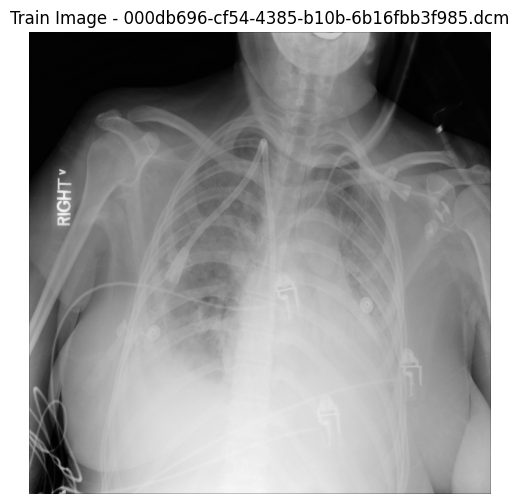

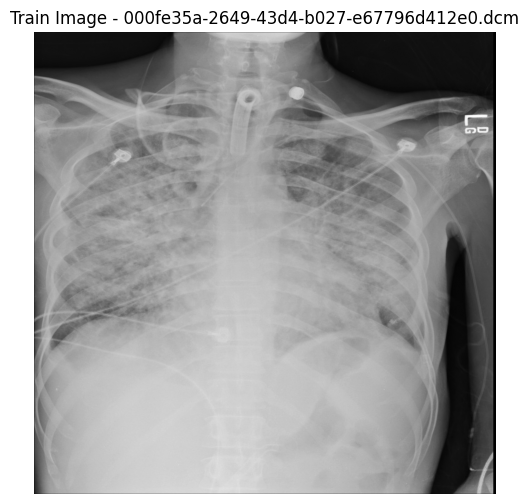

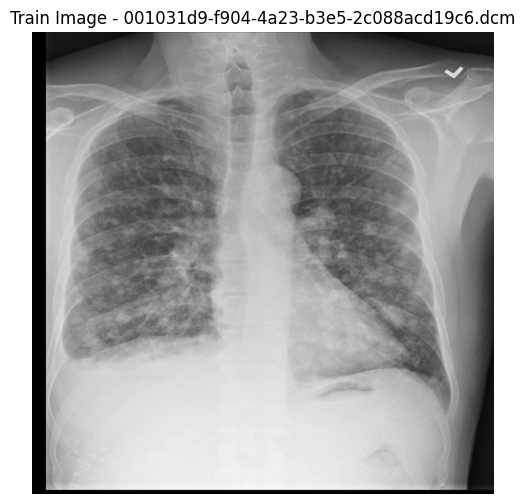

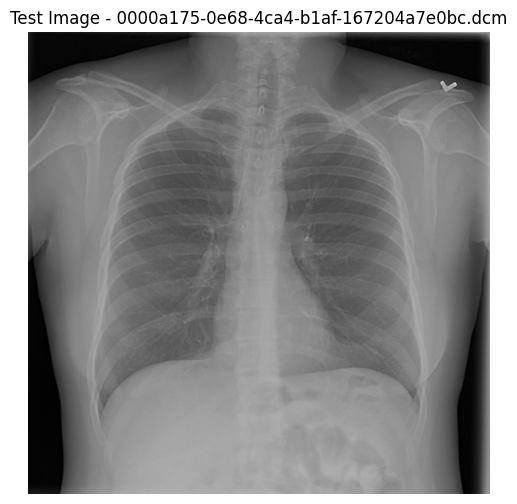

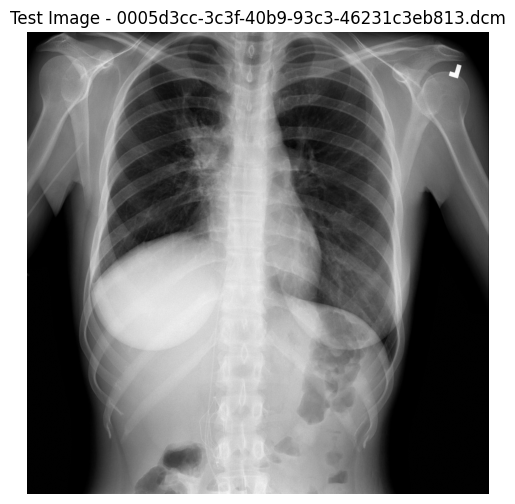

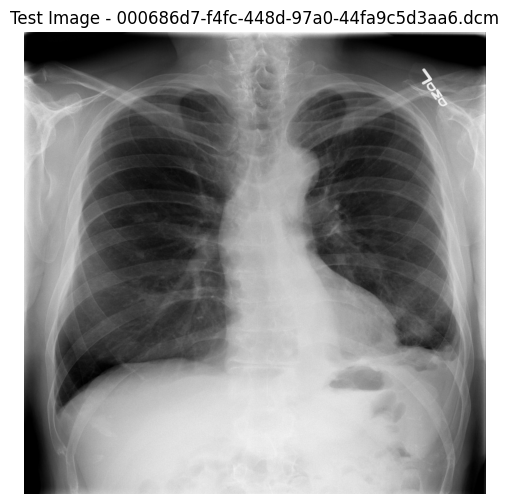

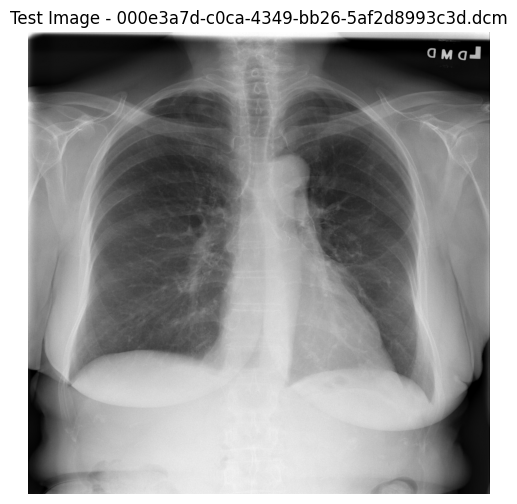

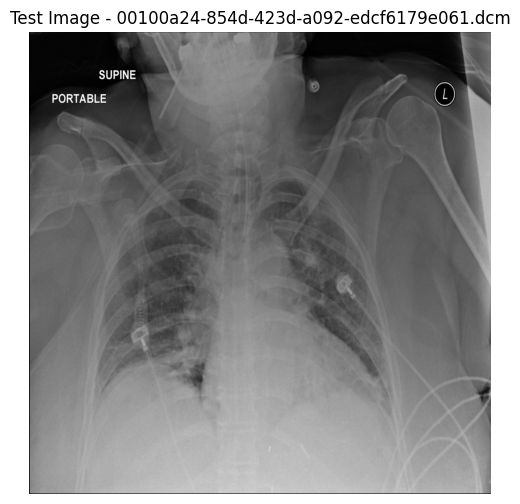

In [42]:
# Display first 5 training images
display_dicom_samples(train_img_path, num_samples=5, title="Train Image")

# Display first 5 test images
display_dicom_samples(test_img_path, num_samples=5, title="Test Image")


In [45]:
def df_overview(df):
    """
    Display an overview of the DataFrame including:
    - Null values
    - Shape
    - Data types
    - Duplicate records
    - Unique value counts
    - Column names
    - Summary info
    """
    
    print('========== DataFrame Overview ==========\n')

    # Show total missing values per column
    print("Null values per column:\n", df.isnull().sum())
    print('\n-----------------------------------------')

    # Show number of rows and columns
    print(f"Shape of DataFrame: {df.shape}")
    print('\n-----------------------------------------')

    # Display basic information about DataFrame (memory usage, types, non-null counts)
    print("DataFrame Info:")
    df.info()
    print('\n-----------------------------------------')

    # Show data types of each column
    print("Data types:\n", df.dtypes)
    print('\n-----------------------------------------')

    # Show column names
    print("Column names:\n", df.columns.tolist())
    print('\n-----------------------------------------')

    # Check for duplicate rows
    print(f"Duplicate rows: {df.duplicated().sum()}")
    print('\n-----------------------------------------')

    # Count of unique values per column
    print("Unique value counts:\n", df.nunique())
    print('\n=========================================')


In [51]:
def df_describe(df):
    """
    Display descriptive statistics for numerical and categorical columns in the DataFrame.
    """
    print('========== DataFrame Description ==========\n')

    # Numeric columns
    print("Numerical Columns Description:\n")
    print(df.describe())

    # Categorical columns
    cat_cols = df.select_dtypes(include='object').columns
    if len(cat_cols) > 0:
        print('\nCategorical Columns Description:\n')
        print(df[cat_cols].describe())
    else:
        print('\nNo categorical columns to describe.')

    print('\n=============================================')


In [53]:
df_describe(df_lable)

========== DataFrame Description ==========

Numerical Columns Description:

                 x            y        width       height        Target
count  9555.000000  9555.000000  9555.000000  9555.000000  30227.000000
mean    394.047724   366.839560   218.471376   329.269702      0.316108
std     204.574172   148.940488    59.289475   157.750755      0.464963
min       2.000000     2.000000    40.000000    45.000000      0.000000
25%     207.000000   249.000000   177.000000   203.000000      0.000000
50%     324.000000   365.000000   217.000000   298.000000      0.000000
75%     594.000000   478.500000   259.000000   438.000000      1.000000
max     835.000000   881.000000   528.000000   942.000000      1.000000

Categorical Columns Description:

                                   patientId
count                                  30227
unique                                 26684
top     7d674c82-5501-4730-92c5-d241fd6911e7
freq                                       4



In [54]:
def missing_data(df):
    """
    Returns a DataFrame showing the total and percentage of missing values per column,
    sorted by the most missing data first.
    
    Parameters:
    - df (pd.DataFrame): The input DataFrame.

    Returns:
    - pd.DataFrame: A summary of missing data with columns ['Total', 'Percent'].
    """
    # Total missing values per column
    total = df.isnull().sum().sort_values(ascending=False)

    # Percentage of missing values
    percent = (total / len(df) * 100).sort_values(ascending=False)

    # Combine results into one DataFrame
    missing_df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

    return missing_df


In [67]:
def get_feature_distribution(data, feature):
    # Get the count for each label
    label_counts = data[feature].value_counts()

    # Get total number of samples
    total_samples = len(data)

    # Count the number of items in each class
    print("Feature: {}".format(feature))
    for i in range(len(label_counts)):
        label = label_counts.index[i]
        count = label_counts.values[i]
        percent = int((count / total_samples) * 10000) / 100
        print("{:<30s}:   {} or {}%".format(label, count, percent))



In [56]:
missing_data(df_detail_class)

,Total,Percent
patientId,0,0.0
class,0,0.0


In [60]:
print("\n Print the vlaue count of different classes in dataset:\n",df_detail_class['class'].value_counts())



 Print the vlaue count of different classes in dataset:
 class
No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: count, dtype: int64


In [63]:
print("\n Print the vlaue count of different Target classes in dataset:\n",df_lable['Target'].value_counts())


 Print the vlaue count of different Target classes in dataset:
 Target
0    20672
1     9555
Name: count, dtype: int64


In [65]:
print('\n merge the dataset')
pnemonia= pd.merge(df_lable,df_detail_class, on='patientId', how='inner')
pnemonia.head()


 merge the dataset


,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity


In [68]:
get_feature_distribution(pnemonia, 'class')

Feature: class
Lung Opacity                  :   16957 or 45.06%
No Lung Opacity / Not Normal  :   11821 or 31.41%
Normal                        :   8851 or 23.52%


Visualization


In [ ]:
fig, ax = plt.subplots(nrows=1,figsize=(6,6))
tmp = pnemonia.groupby('Target')['class'].value_counts()
df = pd.DataFrame(data={'Exams': tmp.values}, index=tmp.index).reset_index()
sns.barplot(ax=ax,x = 'Target', y='Exams',hue='class',data=df, palette='Set3')
plt.title("Chest exams class and Target")
plt.show()

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=pnemonia, x='class', order=pnemonia['class'].value_counts().index, palette='Set3')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [79]:
dflable= df_lable.copy()

In [69]:
# Number of entries in Train label dataframe:
print('The train_label dataframe has {} rows and {} columns.'.format(df_lable.shape[0], df_lable.shape[1]))

The train_label dataframe has 30227 rows and 6 columns.


In [ ]:
# Number of duplicates in patientId:
print('Number of unique patientId are: {}'.format(dflable['patientId'].nunique()))

Number of unique patientId are: 26684


In [ ]:
dflable.drop_duplicates('patientId').shape[0]

26684

In [ ]:
one = dflable[dflable.Target == 1].drop_duplicates('patientId').shape[0]
zero = dflable[dflable.Target == 0].drop_duplicates('patientId').shape[0]
total = dflable.drop_duplicates('patientId').shape[0]

No of entries which has Pneumonia: 6012 i.e., 23.0%
No of entries which don't have Pneumonia: 20672 i.e., 1.0%


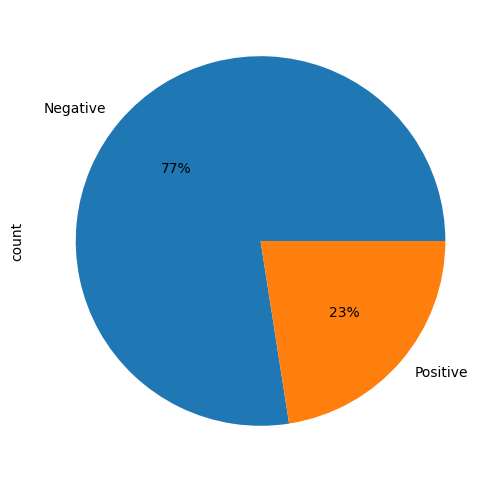

In [81]:
print(f'No of entries which has Pneumonia: {one} i.e., {round(one/total*100, 0)}%')
print(f'No of entries which don\'t have Pneumonia: {zero} i.e., {round(zero/total, 0)}%')
_ = dflable.drop_duplicates('patientId').drop_duplicates('patientId')['Target'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = ['Negative', 'Positive'], figsize = (10, 6))

In [82]:
# Checking nulls in bounding box columns:
print('Number of nulls in bounding box columns: {}'.format(dflable[['x', 'y', 'width', 'height']].isnull().sum().to_dict()))

Number of nulls in bounding box columns: {'x': 20672, 'y': 20672, 'width': 20672, 'height': 20672}


In [83]:
bounding_box = dflable.groupby('patientId').size().to_frame('number_of_boxes').reset_index()
train_labels = dflable.merge(bounding_box, on = 'patientId', how = 'left')
print('Number of patientIds per bounding box in the dataset: ')
(bounding_box.groupby('number_of_boxes').size().to_frame('number_of_patientId').reset_index().set_index('number_of_boxes').sort_values(by = 'number_of_boxes'))

Number of patientIds per bounding box in the dataset: 


,number_of_patientId
number_of_boxes,
1,23286
2,3266
3,119
4,13


Thus, there are 23286 unique patients which have only one entry in the dataset. It also has the patientsbounding box, 3266 with 2 bounding box, 119 with 3 bounding box and 13 with 4 bounding box coordinates.